# Indentify The Digit using Logistics Regression

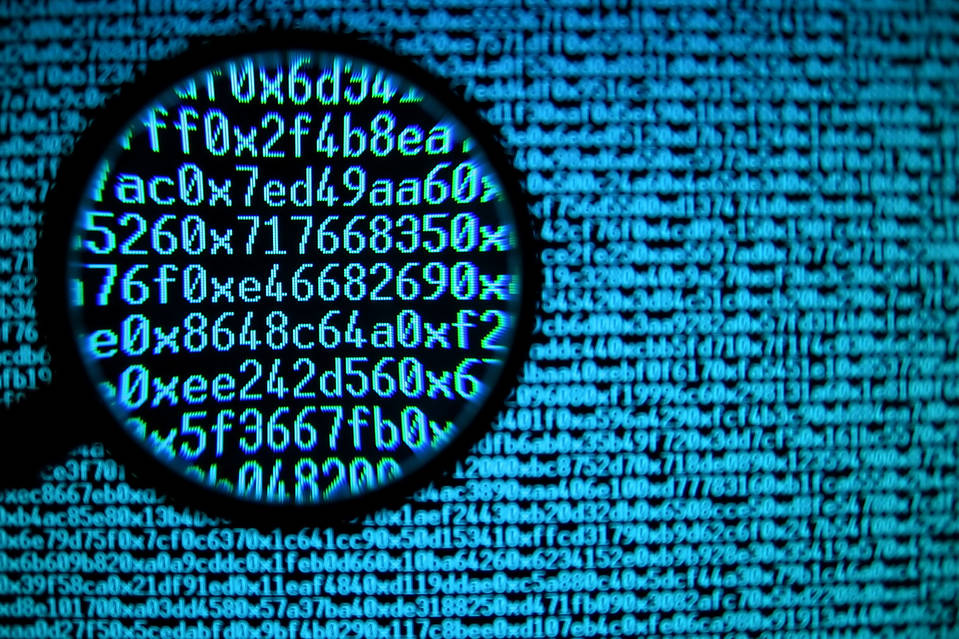

In [1]:
# install the dependencies
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression   
from sklearn.metrics import accuracy_score
from sklearn import metrics
%matplotlib inline

In [2]:
# Load the dataset
from sklearn.datasets import load_digits
digits=load_digits()

In [3]:
# shape of dataset
print("Image Data Shape",digits.data.shape)

Image Data Shape (1797, 64)


In [4]:
# Label shape of dataset
print("Label Data Shape",digits.target.shape)

Label Data Shape (1797,)


# Logistic Regression on Digits Dataset


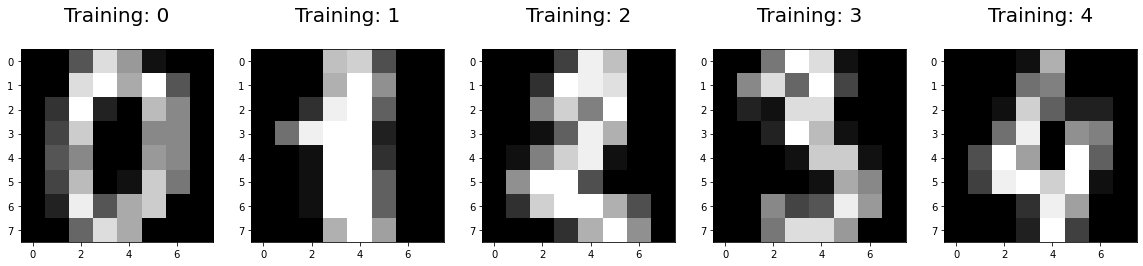

In [5]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

In [6]:
# split the data into training and testing 
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.23,random_state=2)
print("shape of x_train= ",X_train.shape)
print("shape of x_test= ",X_test.shape)
print("shape of y_train= ",y_train.shape)
print("shape of y_test= ",y_test.shape)

shape of x_train=  (1383, 64)
shape of x_test=  (414, 64)
shape of y_train=  (1383,)
shape of y_test=  (414,)


##  Model Building

In [7]:
model=LogisticRegression()

In [9]:
model.fit(X_train,y_train)

C:\Users\Pranav\.continuum\ppp\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
# Return a Numpy Array 
# predict for one observation (image)
print(model.predict(X_test[0].reshape(1,-1)))

[4]


In [12]:
model.predict(X_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [13]:
prediction=model.predict(X_test)

In [14]:
score=model.score(X_test,y_test)
print(score)

0.9516908212560387


In [26]:
# confusion_matrix
cm=metrics.confusion_matrix(y_test,prediction)
cm

array([[37,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  1,  0,  0,  0,  0,  1,  1],
       [ 0,  0, 43,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  3,  1],
       [ 0,  1,  0,  0,  1, 44,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 39,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 37,  1],
       [ 0,  0,  0,  2,  0,  1,  0,  0,  1, 30]], dtype=int64)

## Showing the Images and Labels (MNIST)

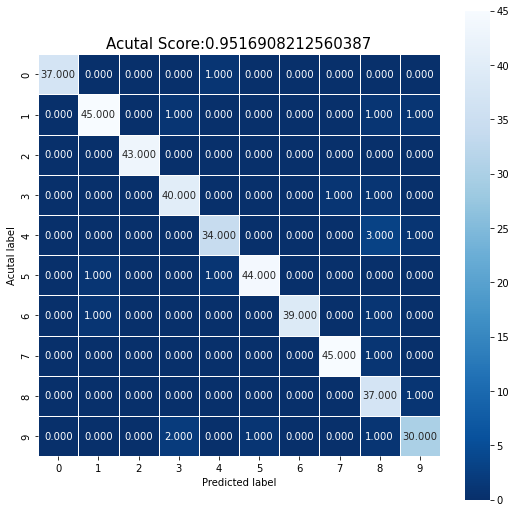

In [25]:
# Heatmap
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt=".3f",linewidths=.5,square=True,cmap='Blues_r');
plt.ylabel('Acutal label');
plt.xlabel('Predicted label');
all_sample_title='Acutal Score:{0}'.format(score)
plt.title(all_sample_title,size=15);

## Prediction

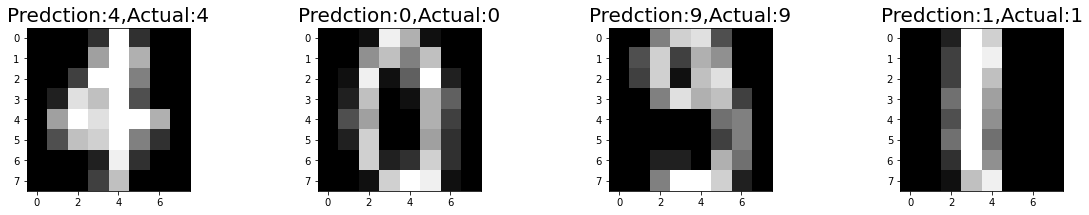

In [28]:
index=0
classifiedIndex=[]
for predict,actual in zip(prediction,y_test):
    if predict==actual:
        classifiedIndex.append(index)
    index +=1
    
plt.figure(figsize=(20,3))
for plotIndex,wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1,4,plotIndex +1)
    plt.imshow(np.reshape(X_test[wrong], (8,8)), cmap=plt.cm.gray)
    plt.title('Predction:{},Actual:{}'.format(prediction[wrong],y_test[wrong]) ,fontsize = 20)
    